# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd

student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data


,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

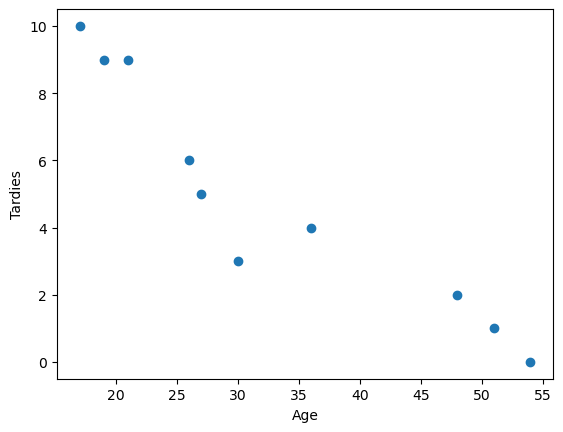

In [2]:
import matplotlib.pyplot as plt

x = student_data[["X"]]
y = student_data["Y"]

plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# the number of tardies decreases with age

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [3]:
#correlation:
display(student_data.corr())

#covariance:
display(student_data.cov())

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [ ]:

# the two measures are strongly correlated, since the correlation value is close to -1
# the covariance is negative, wich means they do not "grow" in the same direction
    # when one of the variables "grow" the onther one doesn't

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [4]:
from sklearn import linear_model

model = linear_model.LinearRegression() # using linear regression
model.fit(x,y)

/Users/Vivian/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


LinearRegression()

Plot your regression model on your scatter plot.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

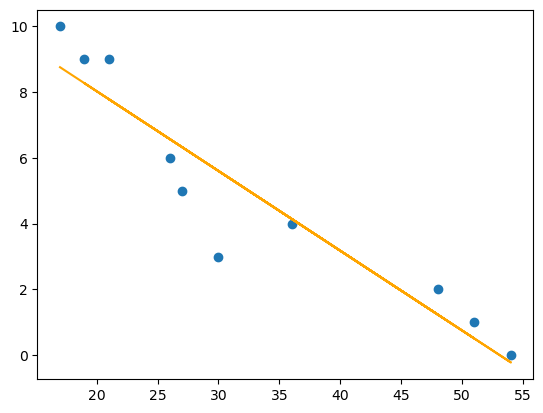

In [5]:
y_hat = model.intercept_ + model.coef_*x
plt.plot(x.values, y_hat.values, c="orange")
plt.scatter(x,y)

plt.show()

In [ ]:
model.score(x, y)

# the two measures are strongly correlated and they do not "grow" in the same direction

# age is a good predictor of tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [7]:
vehicles = pd.read_csv("vehicles.csv")

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [8]:
vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]].corr()


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
# the variable that is more correlated to CO2 emissions is "Fuel Barrels/Year"
# the variable that is less correlated to CO2 emissions is "Year"

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [9]:
x = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

# create an empty model
model = linear_model.LinearRegression() # using linear regression

# train the model - getting the best line that fits our data
model.fit(x,y)

LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [10]:
# R2 score
display(model.score(x,y))
# check the coeficients
display(model.intercept_) #b0
display(model.coef_)# b1

# the R2 score is very close to 1, so we can agree that the linear regression
# with these variables is very reliable

0.9808734920269122

769.8882836465739

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [11]:
party_data = pd.DataFrame({'envited': [1,3,4,6,8,9,11,14], 'atended': [1,2,4,4,5,7,8,13]})
party_data["no_shows"] = party_data["envited"]-party_data["atended"]
party_data

,envited,atended,no_shows
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

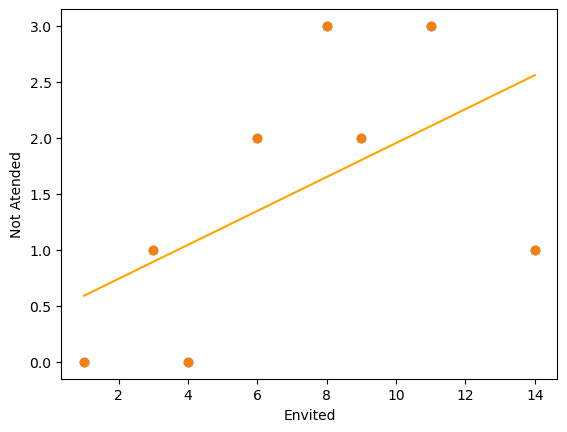

In [12]:
x = party_data[["envited"]]
y = party_data["no_shows"]

plt.scatter(x, y)
plt.xlabel("Envited")
plt.ylabel("Not Atended")

model = linear_model.LinearRegression() # using linear regression
model.fit(x,y)
y_hat = model.intercept_ + model.coef_*x
plt.plot(x.values, y_hat.values, c="orange")
plt.scatter(x,y)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [13]:
# R2 score
display(model.score(x,y))
# check the coeficients
display(model.intercept_) #b0
display(model.coef_)# b1

# the R2 score is low, it says that the regression is a poor representation of the data

0.3030303030303031

0.4393939393939392

array([0.15151515])

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

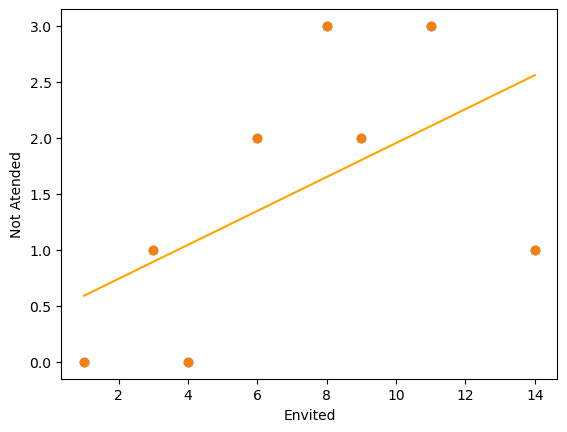

In [14]:
# party_data.drop(index=7, inplace=True)

x = party_data[["envited"]]
y = party_data["no_shows"]

plt.scatter(x, y)
plt.xlabel("Envited")
plt.ylabel("Not Atended")

model = linear_model.LinearRegression() # using linear regression
model.fit(x,y)
y_hat = model.intercept_ + model.coef_*x
plt.plot(x.values, y_hat.values, c="orange")
plt.scatter(x,y)
plt.show()

In [15]:
# R2 score
display(model.score(x,y))
# check the coeficients
display(model.intercept_) #b0
display(model.coef_)# b1

0.3030303030303031

0.4393939393939392

array([0.15151515])

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [16]:
# the R2 score is much better than before, removing the outlier improved the fit of the regression to the data